In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('advertising.csv')
print(data.head())
print(data.columns)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [4]:
X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train

(        TV  Radio  Newspaper
 79   116.0    7.7       23.1
 197  177.0    9.3        6.4
 38    43.1   26.7       35.1
 24    62.3   12.6       18.3
 122  224.0    2.4       15.6
 ..     ...    ...        ...
 106   25.0   11.0       29.7
 14   204.1   32.9       46.0
 92   217.7   33.5       59.0
 179  165.6   10.0       17.6
 102  280.2   10.1       21.4
 
 [160 rows x 3 columns],
 79     11.0
 197    14.8
 38     10.1
 24      9.7
 122    16.6
        ... 
 106     7.2
 14     19.0
 92     19.4
 179    17.6
 102    19.8
 Name: Sales, Length: 160, dtype: float64)

In [6]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [7]:
new_budget = pd.DataFrame({'TV': [150], 'Radio': [20], 'Newspaper': [30]})
predicted_sales = model.predict(new_budget)
print(f"Predicted Sales for the new budget: {predicted_sales[0]}")


Predicted Sales for the new budget: 15.039523680317233


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.274826210954934
Mean Squared Error: 2.907756910271091
R-squared: 0.9059011844150826


In [9]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


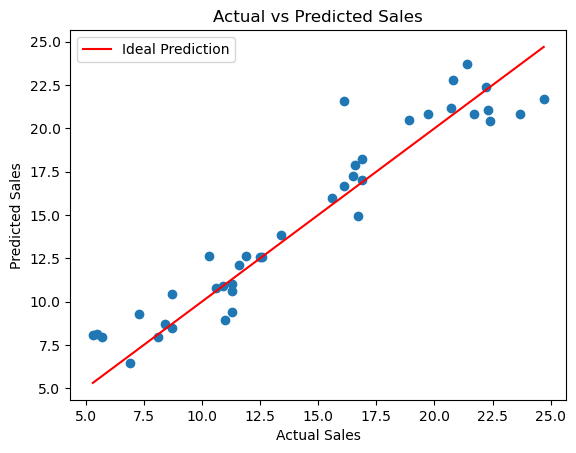

In [10]:
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.scatter(y_test, y_pred)
plt.plot(x_line, x_line, color='red', linestyle='-', label='Ideal Prediction')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()